In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\MR.INDIA\Desktop\DataSets\loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
# df.describe()

In [6]:
df.info()
# df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [7]:
cl = df[["int.rate","installment"]]
cl.head()

,int.rate,installment
0,0.1189,829.10
1,0.1071,228.22
2,0.1357,366.86
3,0.1008,162.34
4,0.1426,102.92


In [8]:
# plt.scatter(df["int.rate"],df["installment"])

In [9]:
cl2= df[["log.annual.inc","dti"]]
cl2.head()

,log.annual.inc,dti
0,11.350407,19.48
1,11.082143,14.29
2,10.373491,11.63
3,11.350407,8.10
4,11.299732,14.97


In [10]:
# plt.scatter(df["log.annual.inc"],df['dti'])

In [11]:
from sklearn.cluster import KMeans
km = KMeans()

In [12]:
# df.purpose.unique()
sse=[]
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(cl)
    sse.append(km.inertia_)

In [13]:
sse

[410647630.3394278,
 121373017.9829423,
 56321811.56881386,
 30705564.175789364,
 20714632.35393485,
 13420214.996676229,
 8971557.83037946,
 6476382.184570147,
 5269841.770080047,
 4332545.509474924,
 3636735.2458962244,
 3189357.40940616,
 2843442.0206897454,
 2399878.234707111]

Text(0, 0.5, 'Sum sqrt Error')

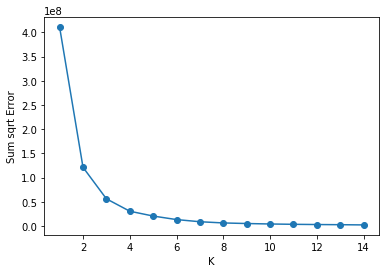

In [14]:
import seaborn as sn
plt.scatter(range(1,15),sse)
sn.lineplot(range(1,15),sse)

plt.xlabel("K")
plt.ylabel("Sum sqrt Error")

In [15]:
km=KMeans(4)
km.fit_predict(cl)

array([0, 1, 1, ..., 3, 1, 0])

In [16]:
cl['cluster']= km.fit_predict(cl)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
cl.head()

,int.rate,installment,cluster
0,0.1189,829.10,0
1,0.1071,228.22,3
2,0.1357,366.86,3
3,0.1008,162.34,1
4,0.1426,102.92,1


In [36]:
c1 = cl[cl.cluster == 0]
c2 = cl[cl.cluster == 1]
c3 = cl[cl.cluster == 2]
c4 = cl[cl.cluster == 3]
# c5 = cl[cl.cluster == 4]

In [37]:
# c4

In [40]:
c4

,int.rate,installment,cluster
1,0.1071,228.22,3
2,0.1357,366.86,3
10,0.1347,360.43,3
11,0.1324,253.58,3
12,0.0859,316.11,3
...,...,...,...
9546,0.1570,262.59,3
9552,0.1311,337.45,3
9573,0.1461,344.76,3
9574,0.1253,257.70,3


### Column--> int.rate, installment 

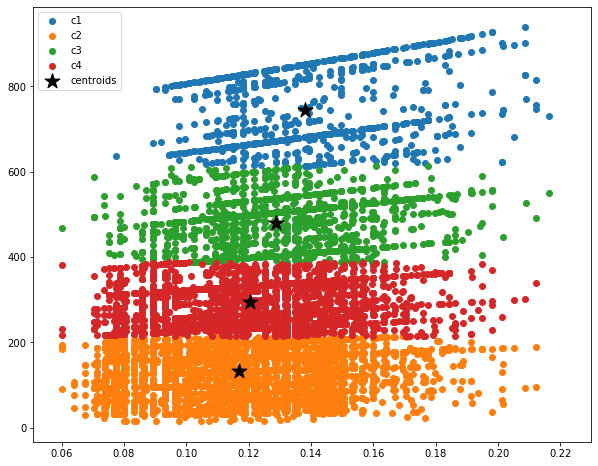

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(c1["int.rate"],c1['installment'],label="c1")
plt.scatter(c2["int.rate"],c2["installment"],label="c2")
plt.scatter(c3["int.rate"],c3["installment"],label="c3")
plt.scatter(c4["int.rate"],c4["installment"],label="c4")
# plt.scatter(c5["int.rate"],c5["installment"],label="c5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            label= "centroids",marker="*",
            color = "black",s=250)
plt.legend()

In [21]:
d=df[["revol.util","fico"]]
d

,revol.util,fico
0,52.1,737
1,76.7,707
2,25.6,682
3,73.2,712
4,39.5,667
...,...,...
9573,82.1,672
9574,1.1,722
9575,82.9,687
9576,3.2,692


In [22]:
sse = []
for i in range(1,15):
    km1=KMeans(n_clusters=i)
    km1.fit(d)
    sse.append(km1.inertia_)
print(sse)

[21870018.899706498, 9813666.427510392, 6886526.024696339, 5083741.0087604085, 4003147.445725405, 3424273.819468738, 2950497.7968185768, 2569728.6797769517, 2277689.9796786862, 2041156.1273576166, 1892161.9986406807, 1745715.5260326464, 1602145.7446639868, 1479812.8395960643]


Text(0, 0.5, 'Sum Sqrt Error')

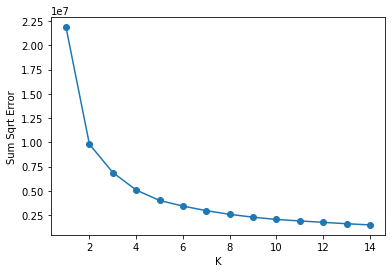

In [23]:
plt.scatter(range(1,15),sse)
plt.plot(range(1,15),sse)
plt.xlabel("K")
plt.ylabel("Sum Sqrt Error")

In [24]:
km1=KMeans(4)
km1.fit_predict(d)

array([0, 0, 3, ..., 2, 3, 0])

In [25]:
d['cluster'] = km1.fit_predict(d)
d

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,revol.util,fico,cluster
0,52.1,737,3
1,76.7,707,3
2,25.6,682,2
3,73.2,712,3
4,39.5,667,2
...,...,...,...
9573,82.1,672,0
9574,1.1,722,2
9575,82.9,687,0
9576,3.2,692,2


In [26]:
c1 = d[d.cluster ==0]
c2 = d[d.cluster ==1]
c3 = d[d.cluster ==2]
c4 = d[d.cluster ==3]
# c5 = d[d.cluster ==4]

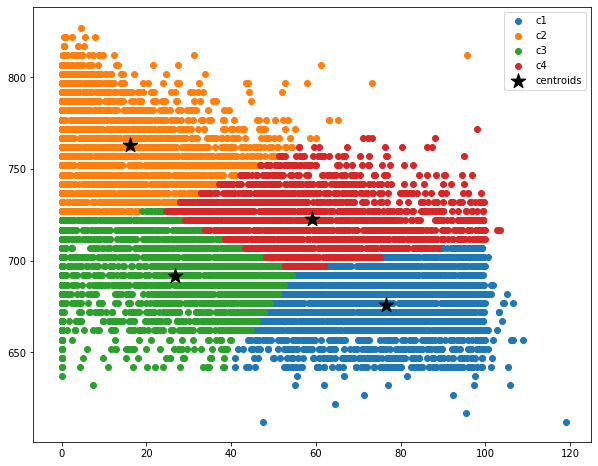

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(c1["revol.util"],c1["fico"],label = "c1")
plt.scatter(c2["revol.util"],c2["fico"],label = "c2")
plt.scatter(c3["revol.util"],c3["fico"],label = "c3")
plt.scatter(c4["revol.util"],c4["fico"],label = "c4")
# plt.scatter(c5["revol.util"],c5["fico"],label = "c5")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],
            label = "centroids",marker = "*",
            color = "black",s = 240)
plt.legend()

In [28]:
d1=df[["dti","revol.util"]]
d1.head()

,dti,revol.util
0,19.48,52.1
1,14.29,76.7
2,11.63,25.6
3,8.10,73.2
4,14.97,39.5


In [29]:
sserror=[]
for i in range(1,15):
    km2=KMeans(n_clusters=i)
    km2.fit(d1)
    sserror.append(km2.inertia_)
sserror

[8516111.928659815,
 2568452.022824293,
 1348058.2056121926,
 924861.2382299046,
 732333.8923216197,
 628537.6008628968,
 564810.960775234,
 508118.4944578876,
 455653.6765879904,
 408762.6903944104,
 360907.494494824,
 330298.3951382141,
 300884.5497376765,
 277791.0863398324]

Text(0, 0.5, 'SS_ERROR')

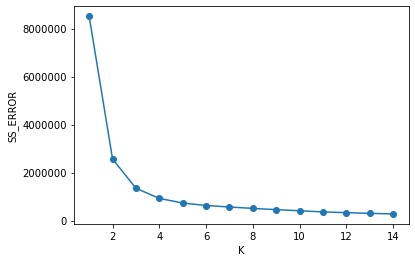

In [30]:
plt.scatter(range(1,15),sserror)
plt.plot(range(1,15),sserror)
plt.xlabel("K")
plt.ylabel('SS_ERROR')

In [31]:
km2=KMeans(5)
km2.fit_predict(d1)


array([0, 3, 4, ..., 2, 1, 3])

In [32]:
d1["cluster"] = km2.fit_predict(d1)
d1

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti,revol.util,cluster
0,19.48,52.1,2
1,14.29,76.7,1
2,11.63,25.6,4
3,8.10,73.2,1
4,14.97,39.5,2
...,...,...,...
9573,10.39,82.1,3
9574,0.21,1.1,0
9575,13.09,82.9,3
9576,19.18,3.2,0


In [33]:
c1 = d1[d1.cluster ==0]
c2 = d1[d1.cluster ==1]
c3 = d1[d1.cluster ==2]
c4 = d1[d1.cluster ==3]
c5 = d1[d1.cluster ==4]

In [34]:
c3

,dti,revol.util,cluster
0,19.48,52.1,2
4,14.97,39.5,2
5,16.98,51.0,2
8,17.25,51.1,2
14,9.73,44.6,2
...,...,...,...
9554,16.16,49.8,2
9559,21.13,54.3,2
9564,12.33,51.2,2
9566,24.06,49.8,2


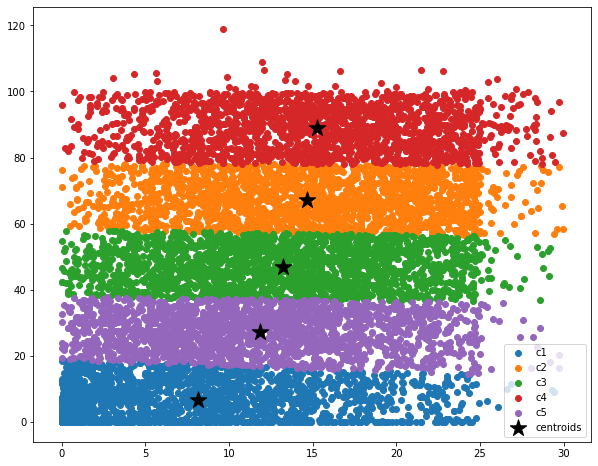

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(c1["dti"],c1["revol.util"],label = "c1")
plt.scatter(c2["dti"],c2["revol.util"],label = "c2")
plt.scatter(c3["dti"],c3["revol.util"],label = "c3")
plt.scatter(c4["dti"],c4["revol.util"],label = "c4")
plt.scatter(c5["dti"],c5["revol.util"],label = "c5")
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],
            label = "centroids",marker = "*",
            color = "black",s = 300)
plt.legend()